In [16]:
# 第一个单元格：导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置图表样式
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("环境准备完成！")

环境准备完成！


# 一.加载并探索数据

In [7]:
# 第二个单元格：加载游戏对局数据
print("正在加载游戏对局数据...")
games_df = pd.read_csv('../data/raw/games.csv')
print(f"游戏数据形状: {games_df.shape}")
print(f"列数: {len(games_df.columns)}")

# 查看前几行
print("\n前3行数据:")
display(games_df.head(3))

# 基本信息
print("\n数据基本信息:")
print(games_df.info())

正在加载游戏对局数据...
游戏数据形状: (51490, 61)
列数: 61

前3行数据:


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28



数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-n

In [8]:
# 第三个单元格：加载英雄信息
print("正在加载英雄信息...")
with open('../data/raw/champion_info.json', 'r', encoding='utf-8') as f:
    champion_info = json.load(f)
    
with open('../data/raw/champion_info_2.json', 'r', encoding='utf-8') as f:
    champion_info_2 = json.load(f)

print(f"champion_info版本: {champion_info.get('version')}")
print(f"champion_info_2版本: {champion_info_2.get('version')}")

# 查看英雄数据结构
print(f"\n英雄数量 (champion_info): {len(champion_info.get('data', {}))}")
print(f"英雄数量 (champion_info_2): {len(champion_info_2.get('data', {}))}")

# 查看几个英雄的例子
sample_champions = list(champion_info.get('data', {}).values())[:3]
print(f"\n示例英雄信息:")
for champ in sample_champions:
    print(f"  {champ.get('name')} (ID: {champ.get('id')}) - 标签: {champ.get('tags', [])}")

正在加载英雄信息...
champion_info版本: 7.17.2
champion_info_2版本: 7.18.1

英雄数量 (champion_info): 138
英雄数量 (champion_info_2): 139

示例英雄信息:
  Annie (ID: 1) - 标签: []
  Olaf (ID: 2) - 标签: []
  Galio (ID: 3) - 标签: []


In [9]:
# 第四个单元格：加载召唤师技能
print("正在加载召唤师技能信息...")
with open('../data/raw/summoner_spell_info.json', 'r', encoding='utf-8') as f:
    summoner_info = json.load(f)

print(f"召唤师技能版本: {summoner_info.get('version')}")
print(f"召唤师技能数量: {len(summoner_info.get('data', {}))}")

# 创建召唤师技能映射
summoner_mapping = {}
for spell_id, spell_data in summoner_info.get('data', {}).items():
    summoner_mapping[int(spell_id)] = {
        'name': spell_data.get('name'),
        'key': spell_data.get('key'),
        'description': spell_data.get('description')
    }

print(f"\n召唤师技能映射创建完成，共 {len(summoner_mapping)} 个技能")

正在加载召唤师技能信息...
召唤师技能版本: 7.17.2
召唤师技能数量: 17

召唤师技能映射创建完成，共 17 个技能


# 二.🔍 关键分析目标
## 1目标变量分析​ (winner)

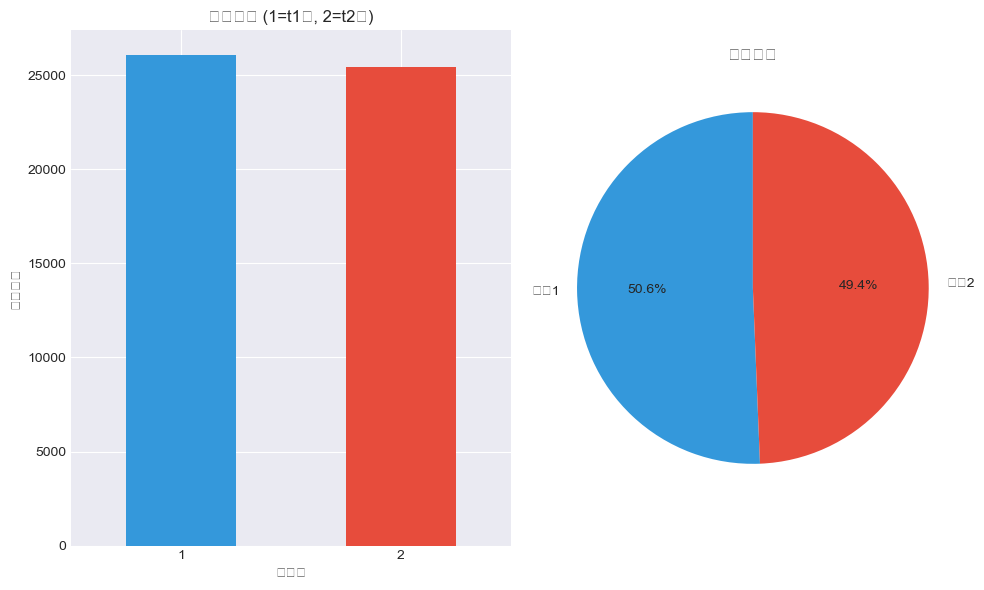

队伍1胜率: 50.64%
队伍2胜率: 49.36%


In [10]:
# 分析胜负分布
plt.figure(figsize=(10, 6))
winner_counts = games_df['winner'].value_counts()
colors = ['#3498db', '#e74c3c']  # 蓝色和红色

plt.subplot(1, 2, 1)
winner_counts.plot(kind='bar', color=colors)
plt.title('胜负分布 (1=t1赢, 2=t2赢)')
plt.xlabel('获胜方')
plt.ylabel('对局数量')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(winner_counts.values, labels=['队伍1', '队伍2'], 
        colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('胜负比例')

plt.tight_layout()
plt.show()

print(f"队伍1胜率: {winner_counts[1]/len(games_df)*100:.2f}%")
print(f"队伍2胜率: {winner_counts[2]/len(games_df)*100:.2f}%")

## 2. 游戏时长分析

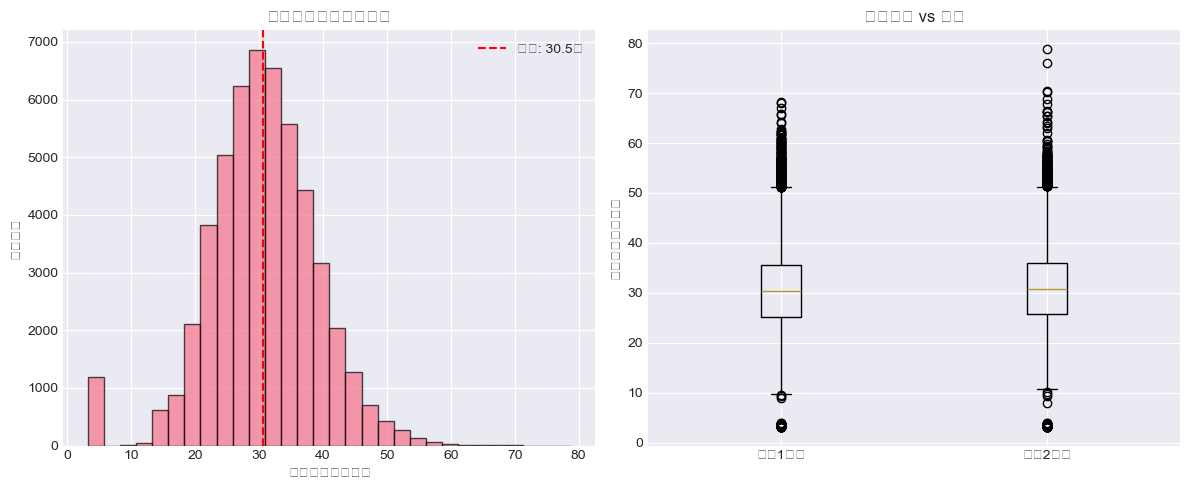

平均游戏时长: 30.5 分钟
最短对局: 3.2 分钟
最长对局: 78.8 分钟


In [11]:
# 将游戏时长转换为分钟
games_df['gameDuration_min'] = games_df['gameDuration'] / 60  # 原始是秒

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(games_df['gameDuration_min'], bins=30, edgecolor='black', alpha=0.7)
plt.title('游戏时长分布（分钟）')
plt.xlabel('游戏时长（分钟）')
plt.ylabel('对局数量')
plt.axvline(games_df['gameDuration_min'].mean(), color='red', 
           linestyle='--', label=f'平均: {games_df["gameDuration_min"].mean():.1f}分')
plt.legend()

plt.subplot(1, 2, 2)
# 时长与胜负的关系
duration_by_winner = games_df.groupby('winner')['gameDuration_min']
plt.boxplot([duration_by_winner.get_group(1), duration_by_winner.get_group(2)], 
           labels=['队伍1胜利', '队伍2胜利'])
plt.title('游戏时长 vs 胜负')
plt.ylabel('游戏时长（分钟）')

plt.tight_layout()
plt.show()

print(f"平均游戏时长: {games_df['gameDuration_min'].mean():.1f} 分钟")
print(f"最短对局: {games_df['gameDuration_min'].min():.1f} 分钟")
print(f"最长对局: {games_df['gameDuration_min'].max():.1f} 分钟")

## 3. 关键事件分析​ (首杀、首塔等)

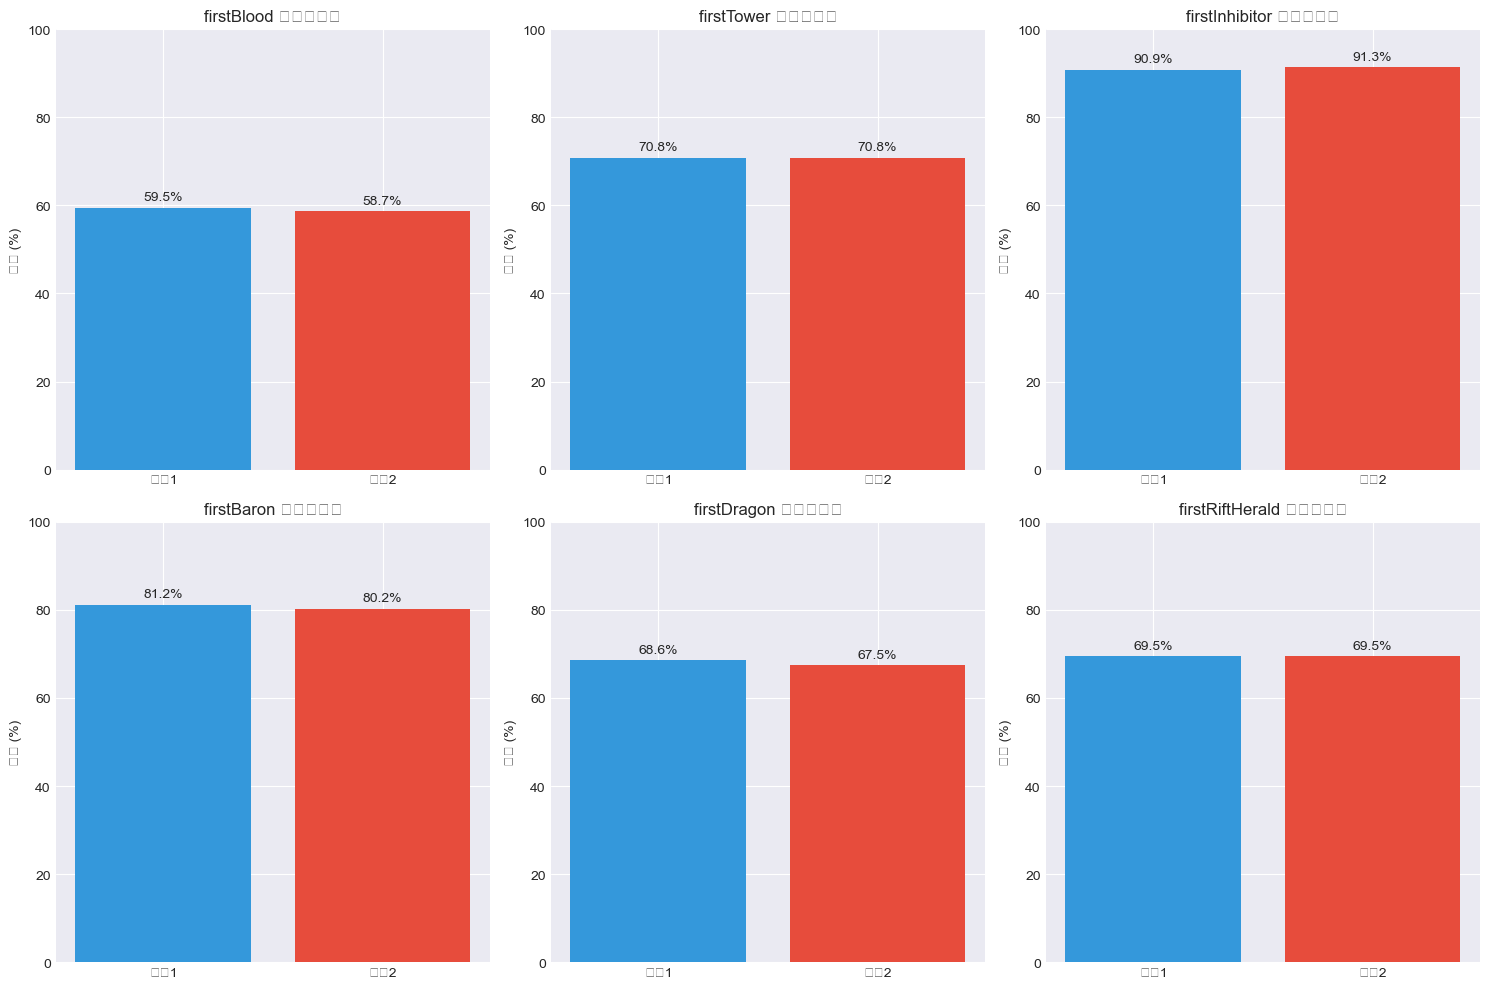

In [ ]:
# 分析各种"first"事件的影响
first_events = ['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']

plt.figure(figsize=(15, 10))
for i, event in enumerate(first_events, 1):
    plt.subplot(2, 3, i)
    
    # 计算获得该事件的队伍的胜率
    event_wins = {}
    for winner in [1, 2]:
        # 获得该事件的队伍
        event_team = games_df[games_df[event] == winner]
        if len(event_team) > 0:
            # 该队伍获胜的比例
            win_rate = (event_team['winner'] == winner).mean() * 100
            event_wins[winner] = win_rate
    
    colors = ['#3498db', '#e74c3c']
    teams = ['队伍1', '队伍2']
    values = [event_wins.get(1, 0), event_wins.get(2, 0)]
    
    bars = plt.bar(teams, values, color=colors)
    plt.title(f'{event} 获得方胜率')
    plt.ylabel('胜率 (%)')
    plt.ylim(0, 100)
    
    # 在柱子上添加数值
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{value:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 4. 英雄选择分析

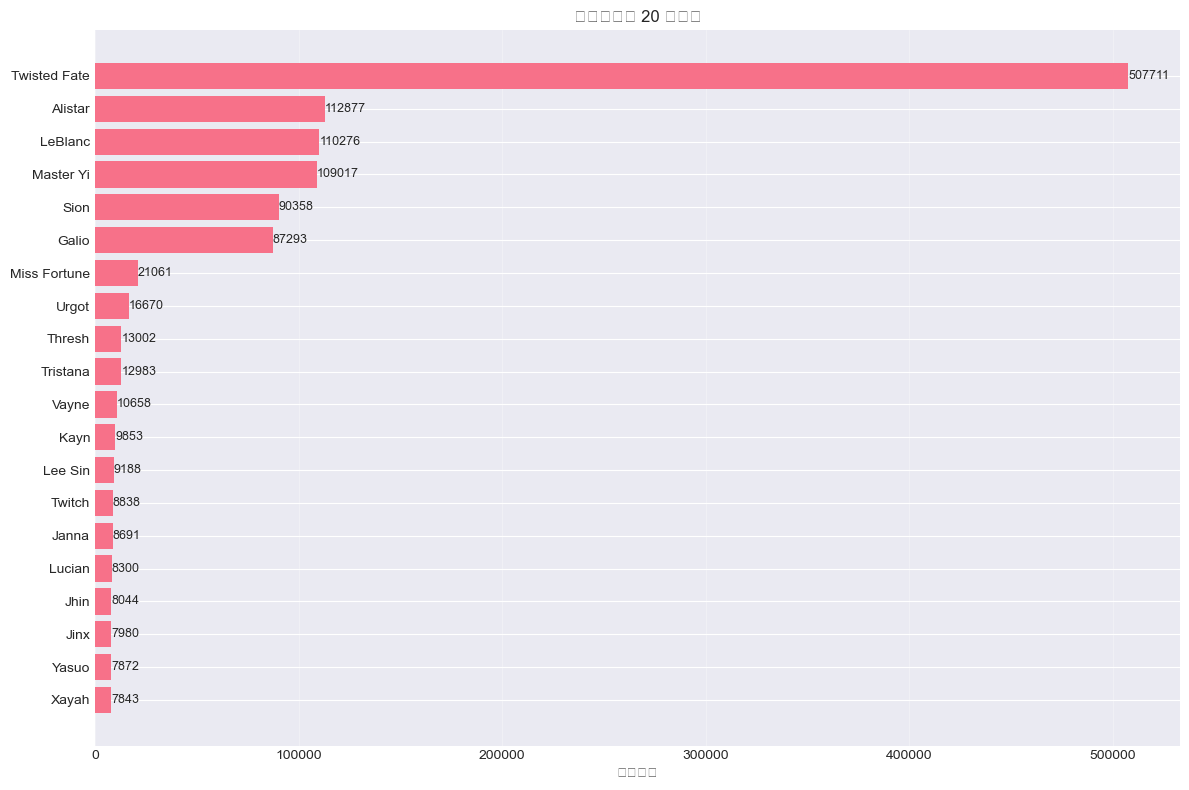

In [14]:
# 分析英雄选择频率
def analyze_champion_picks(games_df, champion_mapping):
    """分析英雄选择频率"""
    # 收集所有英雄ID
    champion_columns = [col for col in games_df.columns if 'champ' in col and 'ban' not in col]
    
    all_champion_ids = []
    for col in champion_columns:
        all_champion_ids.extend(games_df[col].dropna().astype(int).tolist())
    
    # 统计频率
    champ_counts = pd.Series(all_champion_ids).value_counts()
    
    # 转换为DataFrame
    champ_df = pd.DataFrame({
        'champion_id': champ_counts.index,
        'pick_count': champ_counts.values
    })
    
    # 添加英雄名称
    champ_df['champion_name'] = champ_df['champion_id'].map(
        lambda x: champion_mapping.get(str(x), {}).get('name', f'未知({x})')
    )
    
    # 排序
    champ_df = champ_df.sort_values('pick_count', ascending=False)
    
    return champ_df

# 创建英雄映射
champion_mapping = {}
for champ_key, champ_data in champion_info.get('data', {}).items():
    champ_id = champ_data.get('id')
    if champ_id:
        champion_mapping[str(champ_id)] = {
            'name': champ_data.get('name'),
            'key': champ_data.get('key'),
            'tags': champ_data.get('tags', [])
        }

# 分析英雄选择
champ_pick_df = analyze_champion_picks(games_df, champion_mapping)

# 可视化最受欢迎的英雄
plt.figure(figsize=(12, 8))
top_n = 20
top_champs = champ_pick_df.head(top_n)

bars = plt.barh(range(top_n), top_champs['pick_count'][::-1])
plt.yticks(range(top_n), top_champs['champion_name'][::-1])
plt.xlabel('选择次数')
plt.title(f'最受欢迎的 {top_n} 个英雄')
plt.grid(axis='x', alpha=0.3)

# 添加数值标签
for i, (idx, row) in enumerate(top_champs[::-1].iterrows()):
    plt.text(row['pick_count'] + 5, i, str(row['pick_count']), 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

#  📈第四步：创建初步分析报告

In [15]:
# 创建数据探索报告
def create_exploration_report(games_df, champ_pick_df):
    """生成数据探索报告"""
    report = {}
    
    # 1. 基础统计
    report['total_games'] = len(games_df)
    report['avg_duration'] = games_df['gameDuration_min'].mean()
    report['win_rate_t1'] = (games_df['winner'] == 1).mean() * 100
    
    # 2. 关键事件胜率
    first_events = ['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon']
    event_impact = {}
    for event in first_events:
        # 获得该事件的队伍最终获胜的概率
        event_teams = games_df[games_df[event].isin([1, 2])]
        if len(event_teams) > 0:
            win_rate = (event_teams[event] == event_teams['winner']).mean() * 100
            event_impact[event] = win_rate
    
    report['event_impact'] = event_impact
    
    # 3. 英雄多样性
    report['unique_champions'] = champ_pick_df['champion_id'].nunique()
    report['top_5_champs'] = champ_pick_df.head(5)[['champion_name', 'pick_count']].to_dict('records')
    
    # 4. 游戏时长分布
    duration_stats = {
        'min': games_df['gameDuration_min'].min(),
        'max': games_df['gameDuration_min'].max(),
        'median': games_df['gameDuration_min'].median(),
        'std': games_df['gameDuration_min'].std()
    }
    report['duration_stats'] = duration_stats
    
    return report

# 生成报告
exploration_report = create_exploration_report(games_df, champ_pick_df)

print("=" * 60)
print("数据探索报告")
print("=" * 60)
print(f"总对局数: {exploration_report['total_games']:,}")
print(f"平均游戏时长: {exploration_report['avg_duration']:.1f} 分钟")
print(f"队伍1胜率: {exploration_report['win_rate_t1']:.2f}%")
print(f"使用过的独特英雄数量: {exploration_report['unique_champions']}")

print(f"\n关键事件胜率影响:")
for event, win_rate in exploration_report['event_impact'].items():
    print(f"  {event}: 获得方胜率 {win_rate:.1f}%")

print(f"\n最受欢迎的5个英雄:")
for i, champ in enumerate(exploration_report['top_5_champs'], 1):
    print(f"  {i}. {champ['champion_name']}: {champ['pick_count']} 次选择")

数据探索报告
总对局数: 51,490
平均游戏时长: 30.5 分钟
队伍1胜率: 50.64%
使用过的独特英雄数量: 138

关键事件胜率影响:
  firstBlood: 获得方胜率 59.1%
  firstTower: 获得方胜率 70.8%
  firstInhibitor: 获得方胜率 91.1%
  firstBaron: 获得方胜率 80.7%
  firstDragon: 获得方胜率 68.0%

最受欢迎的5个英雄:
  1. Twisted Fate: 507711 次选择
  2. Alistar: 112877 次选择
  3. LeBlanc: 110276 次选择
  4. Master Yi: 109017 次选择
  5. Sion: 90358 次选择
